# Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

#Medical Cost Personal Datasets
data = pd.read_csv("Medical_cost.csv")
print(data.shape)
data

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
#removing duplicate entries
data= data.drop_duplicates(keep="first")
data.shape

(1337, 7)

# Exploratory Data Analysis and data preprocessing

In [3]:
#checking for null values if any
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
print(data["sex"].unique())
print(data["children"].unique())
print(data["smoker"].unique())
print(data["region"].unique())

['female' 'male']
[0 1 3 2 5 4]
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [5]:
data_dup=data.copy(deep=True)

In [6]:
data= pd.get_dummies(data, drop_first=True)

In [7]:
data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


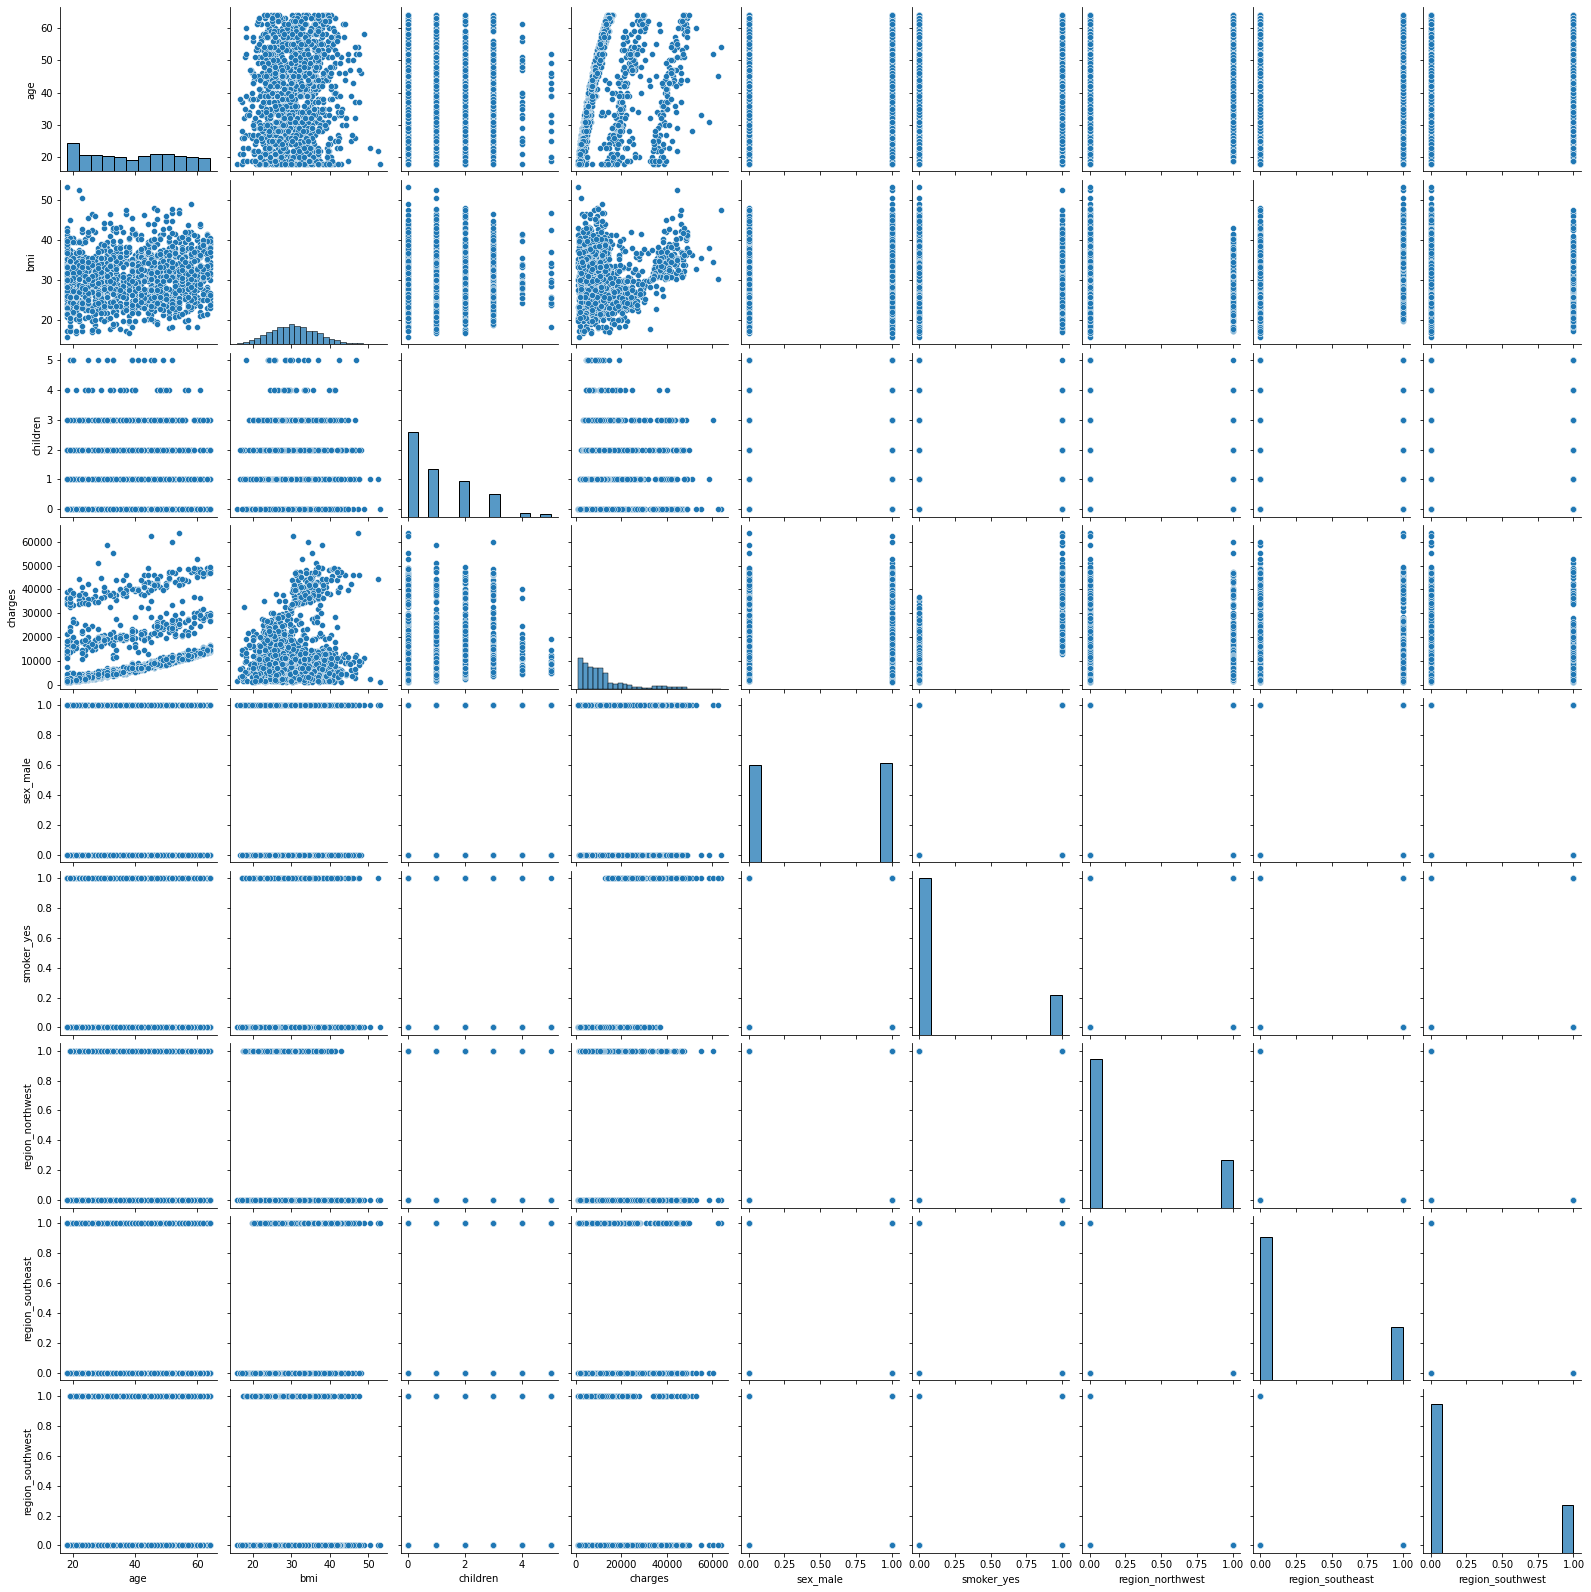

In [8]:
sns.pairplot(data)

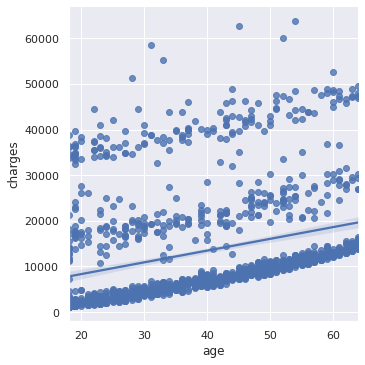

In [9]:
sns.set(color_codes=True)
sns.lmplot(x='age', y='charges',data = data)

The feature "age" is nowhere near to have a linear effect on our target variable "charges" showing that the medical espenses has hardly anything to do with "age" of the person alone!

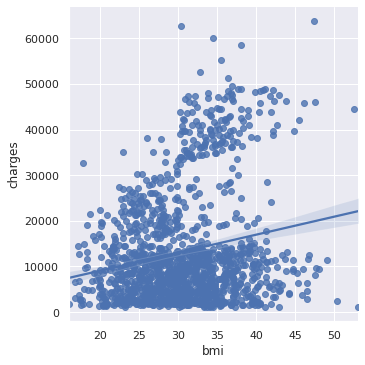

In [10]:
sns.lmplot(x='bmi', y='charges',data = data)

In [11]:
data.corr()['charges'].sort_values()

region_southwest   -0.043637
region_northwest   -0.038695
sex_male            0.058044
children            0.067389
region_southeast    0.073578
bmi                 0.198401
age                 0.298308
smoker_yes          0.787234
charges             1.000000
Name: charges, dtype: float64

<AxesSubplot:>

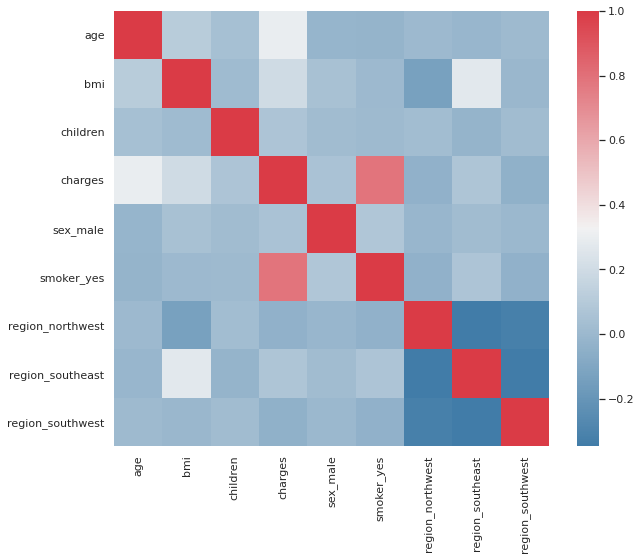

In [12]:
f, ax = plt.pyplot.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 71.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 57.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 43.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 22.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


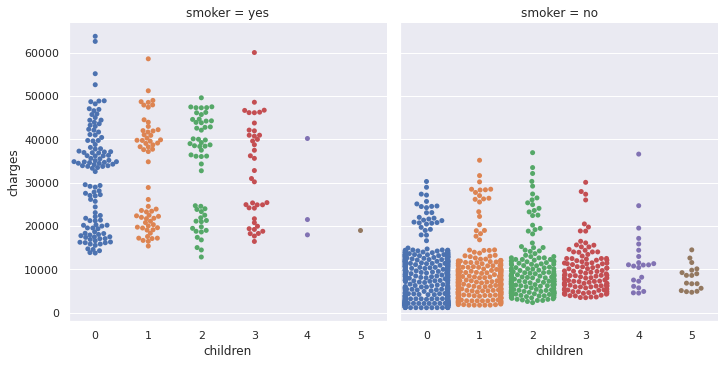

In [13]:
sns.catplot(data=data_dup, kind="swarm", x="children", y="charges", col="smoker")

Charges tend to reach higher for smokers as compared to non-smokers.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 11.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 9.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


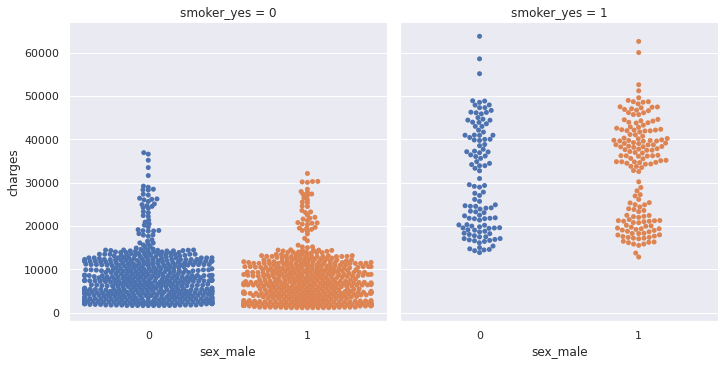

In [14]:
sns.catplot(data=data, kind="swarm", x="sex_male", y="charges", col="smoker_yes")

Charges seems to be slightly higher for women than men in both the categories of smoker.

# Model Training

In [15]:
data.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [16]:
data=data[['age', 'bmi', 'children', 'sex_male', 'smoker_yes','region_northwest', 'region_southeast', 'region_southwest', 'charges']]
data

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,charges
0,19,27.900,0,0,1,0,0,1,16884.92400
1,18,33.770,1,1,0,0,1,0,1725.55230
2,28,33.000,3,1,0,0,1,0,4449.46200
3,33,22.705,0,1,0,1,0,0,21984.47061
4,32,28.880,0,1,0,1,0,0,3866.85520
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0,10600.54830
1334,18,31.920,0,0,0,0,0,0,2205.98080
1335,18,36.850,0,0,0,0,1,0,1629.83350
1336,21,25.800,0,0,0,0,0,1,2007.94500


In [17]:
#TARGET AND INDEPENDENT VARIABLE SPLIT
data = data.sample(frac=1)

X_train,y_train,X_test,y_test= data.iloc[:1000,:-1],data.iloc[:1000,-1],data.iloc[1000:,:-1],data.iloc[1000:,-1]

##   MODEL 1

In [18]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()

# train the model
clf.fit(X_train, y_train)

# predict on test data
predict = clf.predict(X_test)

RMSE: 4458.4750
r2 score: 0.8338


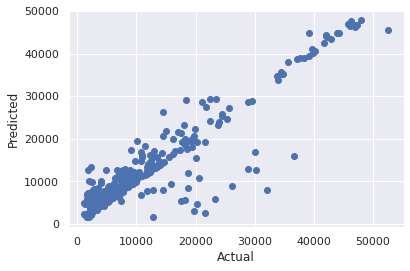

In [19]:
from sklearn.metrics import mean_squared_error, r2_score
plt.pyplot.scatter(y_test, predict)
plt.pyplot.ylabel('Predicted')
plt.pyplot.xlabel('Actual')
print('RMSE: %.4f' % np.sqrt(mean_squared_error(y_test, predict)))
print('r2 score: %.4f' % r2_score(y_test, predict))

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

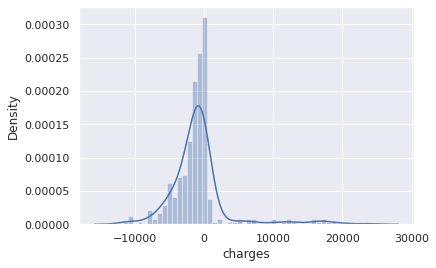

In [20]:
sns.distplot(y_test-predict)

This shows that the random forest regressor works quite well in predicting the health charges.

## MODEL 2

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
dtree = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

In [22]:
DecisionTreeRegressor(criterion='mse')

DecisionTreeRegressor()

In [23]:
predict2= dtree.predict(X_test)

RMSE: 6533.4126
r2 score: 0.6432


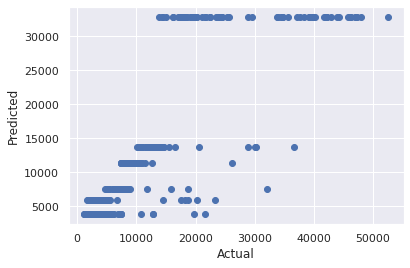

In [24]:
#from sklearn.metrics import mean_squared_error, r2_score
plt.pyplot.scatter(y_test, predict2)
plt.pyplot.ylabel('Predicted')
plt.pyplot.xlabel('Actual')
print('RMSE: %.4f' % np.sqrt(mean_squared_error(y_test, predict2)))
print('r2 score: %.4f' % r2_score(y_test, predict2))

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

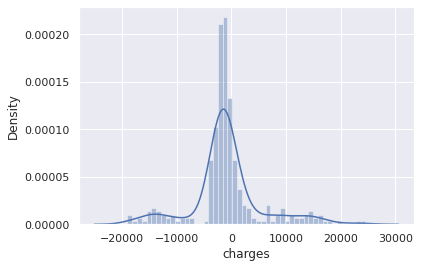

In [25]:
sns.distplot(y_test-predict2)

Comparing the root mean squared errors of both the models and their r2 scores, we can conclude that random forest fits our data better than a decision tree.

## MODEL 3

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X_train)

plr = LinearRegression().fit(X_train,y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,y_test))

0.7241869194196326


RMSE: 5744.2080
r2 score: 0.7242


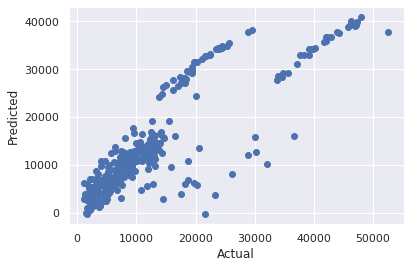

In [27]:
plt.pyplot.scatter(y_test, Y_test_pred)
plt.pyplot.ylabel('Predicted')
plt.pyplot.xlabel('Actual')
print('RMSE: %.4f' % np.sqrt(mean_squared_error(y_test, Y_test_pred)))
print('r2 score: %.4f' % r2_score(y_test, Y_test_pred))

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

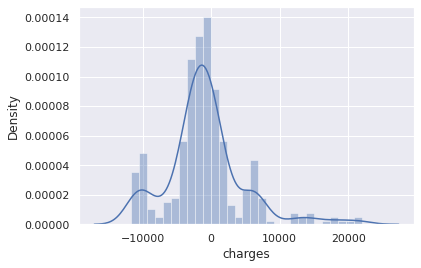

In [28]:
sns.distplot(y_test-Y_test_pred)

Compared to model 1 and 2, model three suits our data the least.

## MODEL 4

In [29]:
import tensorflow as tf
from tensorflow import keras

In [30]:
X_train,y_train,X_test,y_test=X_train.to_numpy(),y_train.to_numpy(),X_test.to_numpy(),y_test.to_numpy()

In [31]:
nn = tf.keras.Sequential([keras.layers.Dense(units=10,activation="linear"),keras.layers.Dense(1, activation='linear')])#units=number of neurons of the neural network
nn.compile(optimizer='adam', loss='mean_squared_error')

nn.fit(X_train,y_train, epochs=1000)

Epoch 1/1000
32/32 [==============================] - 0s 1ms/step - loss: 324001469.0909
Epoch 2/1000
32/32 [==============================] - 0s 948us/step - loss: 332116446.0606
Epoch 3/1000
32/32 [==============================] - 0s 980us/step - loss: 353557804.6061
Epoch 4/1000
32/32 [==============================] - 0s 960us/step - loss: 333087138.9091
Epoch 5/1000
32/32 [==============================] - 0s 946us/step - loss: 334770183.2727
Epoch 6/1000
32/32 [==============================] - 0s 820us/step - loss: 333481120.9697
Epoch 7/1000
32/32 [==============================] - 0s 861us/step - loss: 338954457.2121
Epoch 8/1000
32/32 [==============================] - 0s 1ms/step - loss: 336747289.2121
Epoch 9/1000
32/32 [==============================] - 0s 864us/step - loss: 349051204.8485
Epoch 10/1000
32/32 [==============================] - 0s 978us/step - loss: 324234999.7576
Epoch 11/1000
32/32 [==============================] - 0s 908us/step - loss: 336082841.2121
E

In [32]:
prediction=nn.predict(X_test)

RMSE: 9790.5512
r2 score: 0.1987


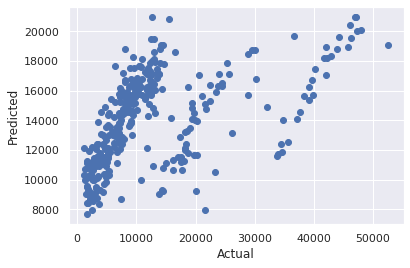

In [33]:
plt.pyplot.scatter(y_test, prediction)
plt.pyplot.ylabel('Predicted')
plt.pyplot.xlabel('Actual')
print('RMSE: %.4f' % np.sqrt(mean_squared_error(y_test, prediction)))
print('r2 score: %.4f' % r2_score(y_test, prediction))

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

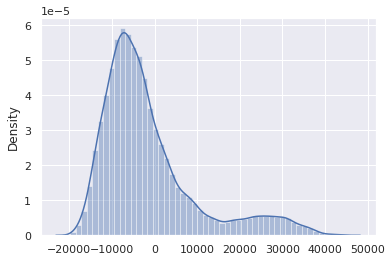

In [34]:
sns.distplot(y_test-prediction)

We have to adjust our hyperparameters to train our DL model better.